# Tree Based Models

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from decision_tree import DecisionTree
from ml_utils import plot_roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

# Classification problem 

In [2]:
titanic = pd.read_csv("data/titanic.csv")

target = "Survived"
features = titanic.columns.tolist()
features.remove(target)

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(
    titanic[features], titanic[target], test_size=0.2
)

In [3]:
len(features)

28

# Let's train & test our Decision Tree

In [4]:
tree = DecisionTree(max_depth=3)
tree.fit(X_train, y_train)

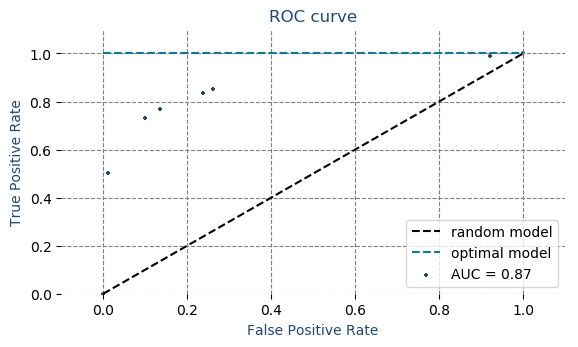

In [5]:
y_train_proba = tree.predict_proba(X_train)[:, 1]
y_train_pred = tree.predict(X_train)

plot_roc_curve(y_train, y_train_proba)

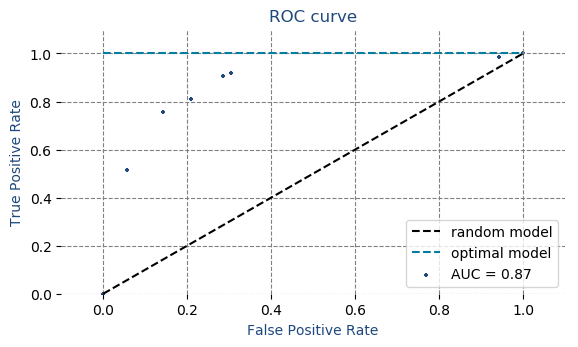

In [6]:
y_test_proba = tree.predict_proba(X_test)[:, 1]
y_test_pred = tree.predict(X_test)

plot_roc_curve(y_test, y_test_proba)

In [7]:
confusion_matrix(y_test, y_test_pred)

array([[90, 15],
       [18, 56]])

### sklearn DecisionTree 

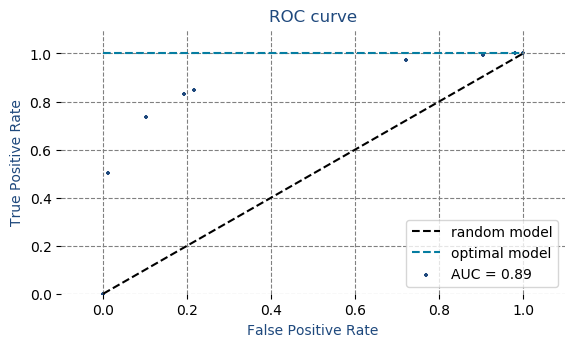

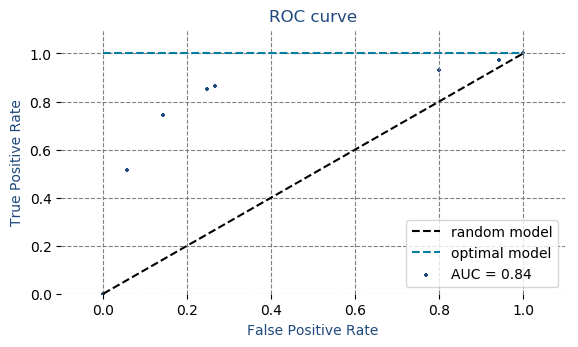

array([[90, 15],
       [19, 55]])

In [8]:
sk_tree = DecisionTreeClassifier(max_depth=3)
sk_tree.fit(X_train, y_train)

y_train_proba_sk = sk_tree.predict_proba(X_train)[:, 1]
y_train_pred_sk = sk_tree.predict(X_train)


plot_roc_curve(y_train, y_train_proba_sk)

y_test_proba_sk = sk_tree.predict_proba(X_test)[:, 1]
y_test_pred_sk = sk_tree.predict(X_test)

plot_roc_curve(y_test, y_test_proba_sk)

confusion_matrix(y_test, y_test_pred_sk)

Great ! Our Decision Tree actually do work approximately as good as sklearn's tree ! (not computationally speaking though)

In [9]:
tree.left.left.left.probability

[0.03571428571428571, 0.9642857142857143]